# Medical transcriptions

<a href='https://www.kaggle.com/datasets/tboyle10/medicaltranscriptions#mtsamples.csv'>source: kaggle.com: Medical Transcriptions</a>  
* Medical transcription data scraped from mtsamples.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
csv = pd.read_csv("datasets/mtsamples.csv")
df = pd.DataFrame(csv)

In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [6]:
df.value_counts("medical_specialty")

medical_specialty
Surgery                          1103
Consult - History and Phy.        516
Cardiovascular / Pulmonary        372
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  230
Neurology                         223
SOAP / Chart / Progress Notes     166
Obstetrics / Gynecology           160
Urology                           158
Discharge Summary                 108
ENT - Otolaryngology               98
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    62
Psychiatry / Psychology            53
Office Notes                       51
Podiatry                           47
Dermatology                        29
Dentistry                          27
Cosmetic / Plastic Surgery      

In [7]:
df.value_counts("sample_name")

sample_name
Lumbar Discogram                        5
Symes Amputation - Hallux               4
Normal Newborn Infant Physical Exam     4
Hypertension - Consult                  4
Neuroblastoma - Consult                 4
                                       ..
Closed Head Injury                      1
Psychiatric Assessment                  1
Closure of Complex Lacerations          1
Coccygeal injection                     1
1-year-old Exam - H&P                   1
Name: count, Length: 2377, dtype: int64

In [8]:
distinct_values = df['medical_specialty'].unique().tolist()
value_counts = df['medical_specialty'].value_counts().tolist()

In [9]:
data = list(zip(distinct_values, value_counts))

In [10]:
df_treemap = pd.DataFrame(data, columns=['medical_specialty', 'value_count'])

In [11]:
df_treemap.head()

,medical_specialty,value_count
0,Allergy / Immunology,1103
1,Bariatrics,516
2,Cardiovascular / Pulmonary,372
3,Neurology,355
4,Dentistry,273


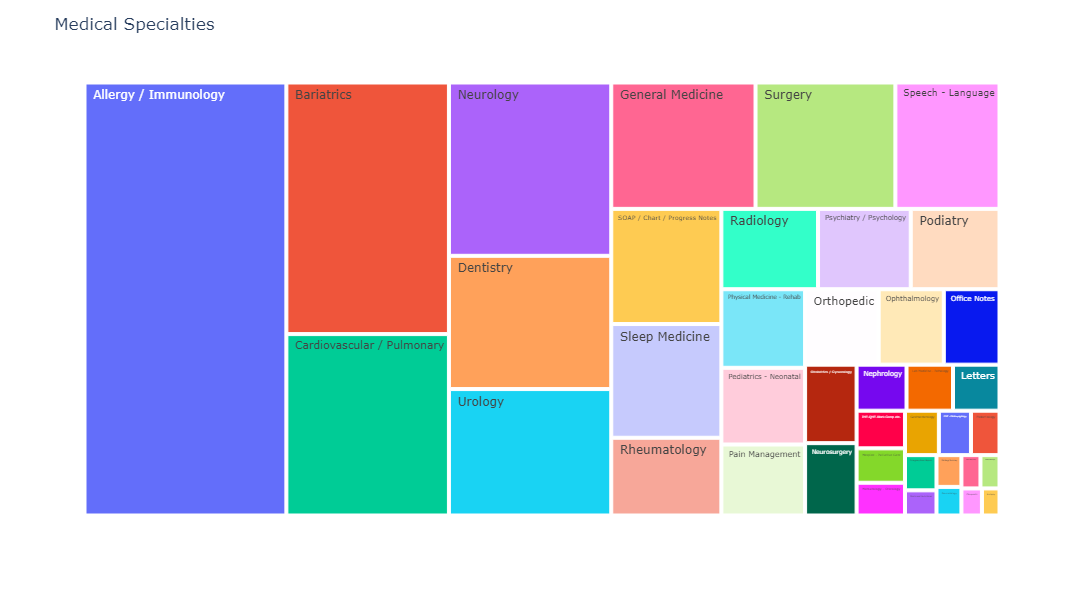

In [13]:
fig = px.treemap(df_treemap, path= ["medical_specialty"], values="value_count")
fig.update_layout(title='Medical Specialties', width=800, height=600)
fig.show()